# STAT5104 Data Mining Assignments

## Content
<p>1. Introduction</p>
<p>2. Learning Outcomes</p>
<p>3. Assignment 1</p>
<p>4. Assignment 2</p>
<p>5. Assignment 3</p>

## 1. Introduction

<p>This course introduces some commonly used multivariate statistical techniques in Business, Finance and Risk Management Science. Statistical packages such as R and EXCEL are used to demonstrate these methods. Below are the techniques.</p>

|       **Technique**     |                                              **Description**                                    |
|:-----------------------:|:------------------------------------------------------------------------------------------------|
|Classification Tree      |Generate simple rules to classify observations.                                                  |
|K-nearest Neighbour      |With training data, classify unlabelled data by  analysis of k number of the nearest data points.|
|Naïve Bayes Classifier   |Classify observations with the application of Bayes' theorem.                                    |
|Logistic Regression      |Predict nominal variable by indenpendent variables.                                              |
|Artificial Neural Network|Mimic the functions and mechanism of our brain to do prediction.                                 |
|K-means Clustering       |Cluster n observations into k homogenous groups.                                                 | 
|Assoication Analysis     |Find assocation rule among variables.                                                            |

## 2. Learning Outcomes

<p>To get the procedure for data mining, from data preparation to analysis and assessment with the application of R.</p>

## 3. Assignment 1

<p>Perform classification tree with outliers removal.</p>

In [3]:
#Read data and save in d
d<-read.csv("bank-market.csv",na.strings="")
#Display dimension of d
dim(d)

#Filter out missing values
#Select and save complete cases as dc
dc<-d[complete.cases(d),]
#Display the dimension of dc
dim(dc)

#Deposit is the target variable
#Select deposit=0 
d0<-dc[(dc$deposit)=="no",]
#Display the dimension of d0
dim(d0)

#Select deposit=1
d1<-dc[(dc$deposit)=="yes",]
#Display the dimension of d1
dim(d1)

[1] 45211    12

[1] 45211    12

[1] 39922    12

[1] 5289   12

<br></br>
<p>Display the dimension of data.</p>
<br></br>

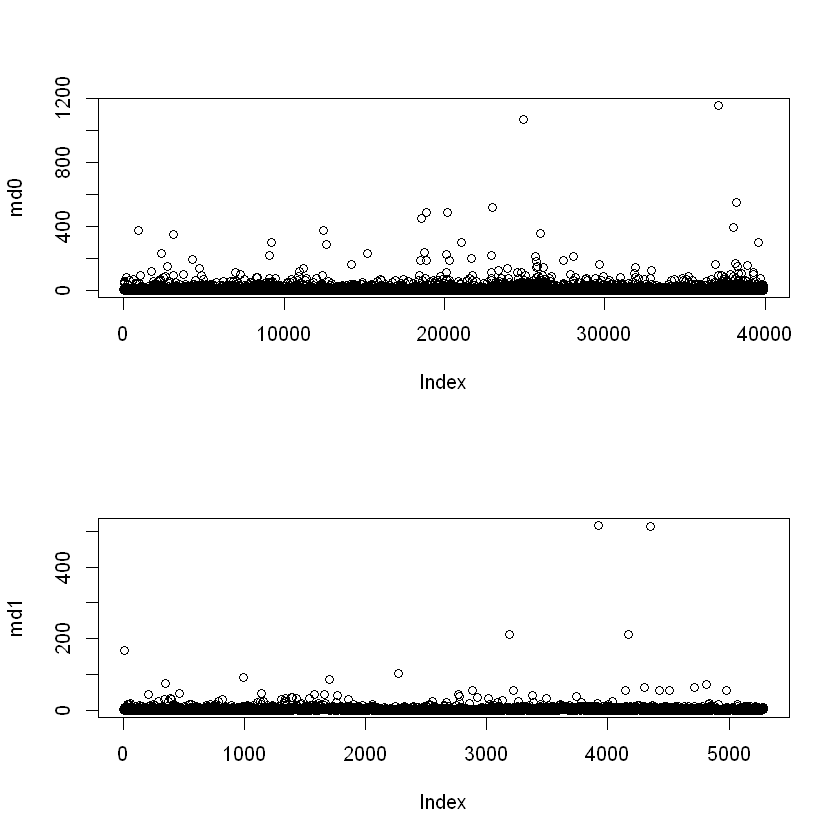

In [5]:
#output mahalanobis distance of x
#Transform x to a matrix
#compute column mean
#compute sample covariance matrit
#Using built-in mahalanobis function
mdist<-function(x) {
  t<-as.matrix(x)
  m<-apply(t,2,mean)
  s<-var(t)
  mahalanobis(t,m,s)
}

#Load the mdist function for d0 &d1
#Compute distance and include column 1,4,7 and save to md0 and md1
md0<-mdist(d0[,c(1,4,7)])
md1<-mdist(d1[,c(1,4,7)])

#Overview of md0 and md1
#set up a 2x1 multframe graphic
par(mfrow=c(2,1))

#Plot md0
plot(md0)

#Plot md1
plot(md1)

<br></br>
<p>Show the outliers calculated by Mahalanobis method with plots.</p>
<br></br>

In [6]:
#Computation of 99-percentile of Chi-square distribution and save to c as a benchmark to filter outliers
c<-qchisq(0.99,df=3)
c

#Values in md0 and md1 which are greater than c will be treated as outliers and filtered out
#Select observations with md0<c from d0
x0<-d0[md0<c,] 
#Display dimension of x0
dim(x0)

#Select observations with md1<c from d1
x1<-d1[md1<c,] 
#Display dimension of x1
dim(x1) 

#Combine x0 and x1 row-wise and save the cleaned data set
#Combine x0 and x1 row-wise 
x<-rbind(x0,x1)
#Display dimension of x
dim(x)

#Save cleaned data set to file 
write.csv(x,file = "bank-market1.csv",sep = ",", row.names = F)

[1] 11.34487

[1] 38490    12

[1] 5150   12

[1] 43640    12

Warning message in write.csv(x, file = "bank-market1.csv", sep = ",", row.names = F):
"attempt to set 'sep' ignored"


<br></br>
<p>Display the dimension of data without outliers.</p>
<br></br>

[1] 43640

[1] "age"       "marital"   "education" "balance"   "housing"   "loan"     
 [7] "duration"  "campaign"  "pdays"     "previous"  "poutcome"  "deposit"

[1] 34912    12

[1] 8728   12

Installing package into 'C:/Users/Tiffany Chung/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tiffany Chung\AppData\Local\Temp\RtmpUbjb4L\downloaded_packages


Installing package into 'C:/Users/Tiffany Chung/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tiffany Chung\AppData\Local\Temp\RtmpUbjb4L\downloaded_packages
n= 34912 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 34912 4099 no (0.88259051 0.11740949)  
   2) duration< 613.5 32677 2772 no (0.91516969 0.08483031)  
     4) poutcome=failure,other,unknown 31655 2111 no (0.93331227 0.06668773) *
     5) poutcome=success 1022  361 yes (0.35322896 0.64677104)  
      10) duration< 132.5 181   39 no (0.78453039 0.21546961) *
      11) duration>=132.5 841  219 yes (0.26040428 0.73959572) *
   3) duration>=613.5 2235  908 yes (0.40626398 0.59373602)  
     6) duration< 892.5 1591  695 no (0.56316782 0.43683218)  
      12) poutcome=failure,other,unknown 1520  633 no (0.58355263 0.41644737) *
      13) poutcome=success 71    9 yes (0.12676056 0.87323944) *
     7) duration>=892.5 644   12 yes (0.01863354 0.98136646) *


   
cl1    no   yes
  1 30573  2783
  2   240  1316

   
cl2   no  yes
  1 7592  701
  2   85  350

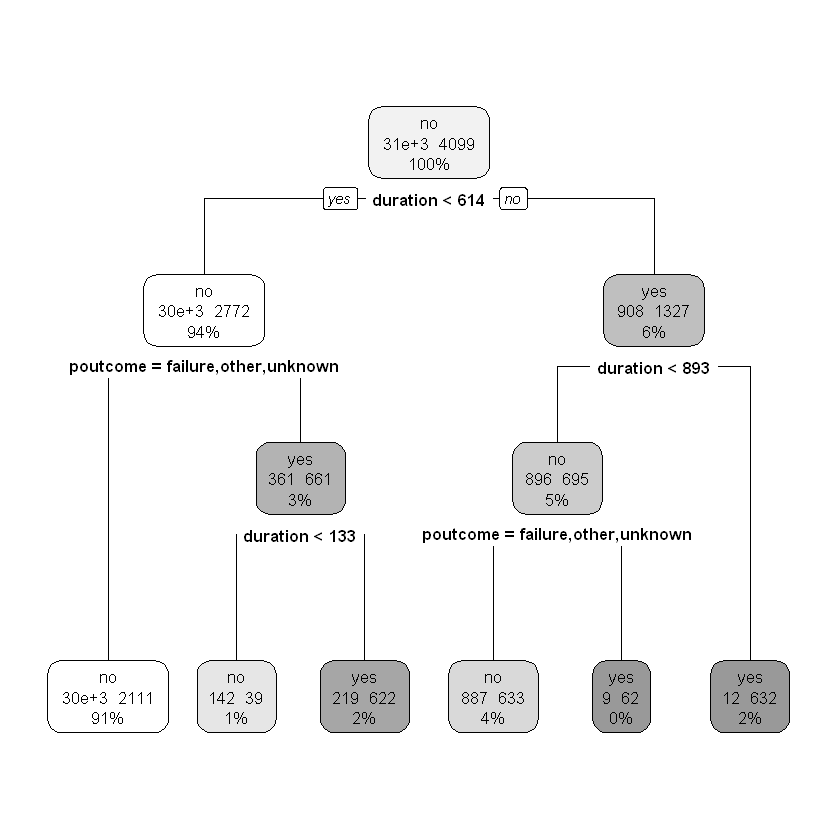

In [7]:
#Read data and save in d
x<-read.csv("bank-market1.csv",na.strings="")
#Get and display no. of rows
(n<-nrow(x))
#Display column names 
names(x)


#Partition x into 80% of d1 as training data set and 20% of d2 as testing data set
#Set the random seed
set.seed(34224)
#Set sampling ratio
r<-0.8
#Sample r*n random integers from 1 to n
id<-sample(1:n,size=round(r*n),replace=F)
#Traning dataset
d1<-x[id,]
#Testing dataset
d2<-x[-id,]
#Display dimension of d1 and d2
dim(d1)
dim(d2)

#Build a ctree for training data set d1
#Prepare to build a ctree
install.packages("rpart")
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)

#Create target y
y<-d1$deposit

#Build a ctree by rpart
ctree<-rpart(y~.,data=d1[,1:11],method="class")

#Plot the ctree
rpart.plot(ctree,extra=101,box.palette = "Grays")

#Print the ctree
print(ctree)

#Produce classification table for d1 and d2
#Prediction on training dataset d1
pr1<-predict(ctree)
#Find col. index of max in each row of pr
cl1<-max.col(pr1)
#Classification table of d1
table(cl1,d1$deposit)

#Prediction on training dataset d2
pr2<-predict(ctree,d2)
#Find col. index of max in each row of pr
cl2<-max.col(pr2)
#Classification table of d2
table(cl2,d2$deposit) 

<br></br>
<p>Display the result of classification tree with classification tables and tree plot.</p>
<br></br>

## 4. Assignment 2

<p>Perform K-nearest Neighbour and Naïve Bayes Classifier with outliers removal.</p>

In [12]:
#Read data and save in d
d<-read.csv("bank-market1.csv",na.strings="")
#Get and display no. of rows
(n<-nrow(d))
#Display column names 
names(d)


#Partition x into 80% of d1 as training dataset and 20% of d2 as testing dataset
#Set the random seed
set.seed(34224)
#Set sampling ratio
r<-0.8
#Sample r*n random integers from 1 to n
id<-sample(1:n,size=round(r*n),replace=F)
#Training dataset
d1<-d[id,]
#Testing dataset
d2<-d[-id,]
#Display dimension of d1 and d2
dim(d1)
dim(d2)

[1] 43640

[1] "age"       "marital"   "education" "balance"   "housing"   "loan"     
 [7] "duration"  "campaign"  "pdays"     "previous"  "poutcome"  "deposit"

[1] 34912    12

[1] 8728   12

<br></br>
<p>Display the dimension of data.</p>
<br></br>

In [13]:
#Select columns 1, 4 and 7 to 10 from d1 and d2 and scale them using scale.con() function
#Function to scale continuous or ordinal variables to [0,1]
scale.con<-function(d) {
#Row dim of d
  n<-dim(d)[1]
#Column dim of d
  p<-dim(d)[2]		
#Column min of d  
  cmin<-apply(d,2,min)
#column max of d
  cmax<-apply(d,2,max)
#Column range
  range<-cmax-cmin
#Change cmin to a nxp matrix
  cmin<-matrix(cmin,nr=n,nc=p,byrow=T)
#Change range to a nxp matrix
  range<-matrix(range,nr=n,nc=p,byrow=T)  
#Transform d  
  (d-cmin)/range	
}  
#Select columns 1, 4 and 7 to 10
z1<-scale.con(d1[,c(1,4,7,8,9,10)])
z2<-scale.con(d2[,c(1,4,7,8,9,10)])

#Installation and load reqiured package for knn
install.packages("class")
library(class)

#Use the improve k_nn() function to perform knn with v=5
#Improved version of knn
#v is an integer vector containing all the value of k to be tested
#cl0, cl1 are class label for train and test data
#if k is an integer, 1 to k is assumed
#Return the k with least error rate

k_nn<-function(x0,x1,cl0,cl1,v,l=0,prob=F,use.all=T) {
#Initialize error rate
  err0=1
#Change v to an integer vector 1:v
  if (length(v)==1) v<-c(1:v)		
  
  for (k in v) {	
#Apply knn
    res<-knn(x0,x1,cl0,k,l,prob,use.all)
#Save c-table
    ctab<-table(res,cl1)
#Compute error rate
    err<-1-sum(diag(ctab))/sum(ctab)
#Update if err<err0
    if (err<err0) {			
      k0<-k
      res0<-res
      err0<-err
      ctab0<-ctab
    }
#Display results
    cat("k=",k," error rate=",err,"\n")		
  }
#Display best result
  cat("best k=",k0," error rate=",err0,"\n")
#Output res0
  res0					
}

#Apply k_nn on data
bank.knn<-k_nn(z1,z2,d1[,12],d2[,12],v=5)

#Misclassification table
table(bank.knn,d2[,12])

Warning message:
"package 'class' is in use and will not be installed"


k= 1  error rate= 0.1099908 
k= 2  error rate= 0.109418 
k= 3  error rate= 0.1004812 
k= 4  error rate= 0.1016269 
k= 5  error rate= 0.09967919 
best k= 5  error rate= 0.09967919 


        
bank.knn   no  yes
     no  7527  720
     yes  150  331

<br></br>
<p>Perform K-nearest Neighbour with normalised data.</p>
<br></br>

In [14]:
#Using stand() function for improved knn
#Function for standardize transformation
stand<-function(x) {
#Row dim of x
  n<-dim(x)[1]
#Column dim of x
  p<-dim(x)[2]
#Compute column mean
  m<-apply(x,2,mean)
#Compute column sd
  s<-apply(x,2,sd)
#Convert m into nxp matrix, each row is m
  m<-matrix(m,nr=n,nc=p,byrow=T)
#Convert s into nxp matrix, each row is s
  s<-matrix(s,nr=n,nc=p,byrow=T)
#Output standardize score
  (x-m)/s		
}

#Appy stand() function on data
# Combine z1 and z2 row-wise
x<-rbind(z1,z2)
#Get row dim of x
n<-dim(x)[1]
#Get row dim of z1
n1<-dim(z1)[1]
#Standardize x
y<-stand(x)
#Get y1 from y for training data
y1<-y[1:n1,]
#Get y2 from 2 for testing data
y2<-y[(n1+1):n,]	

#Use the improve k_nn() function to perform knn with v=5 with standization
bank1.knn<-k_nn(y1,y2,d1[,12],d2[,12],v=5)

#Misclassification table
table(bank1.knn,d2[,12])

k= 1  error rate= 0.1119386 
k= 2  error rate= 0.1112511 
k= 3  error rate= 0.1007104 
k= 4  error rate= 0.1019707 
k= 5  error rate= 0.09956462 
best k= 5  error rate= 0.09956462 


         
bank1.knn   no  yes
      no  7537  729
      yes  140  322

<br></br>
<p>Perform K-nearest Neighbour with standardised data.</p>
<br></br>

## 5. Assignment 3

<p>Perform Logistic Regression, Artificial Neural Network and K-means Clustering with outliers removal.</p>

In [31]:
#Read data set
d<-read.csv("bank-market1.csv")
d$deposit<-as.factor(d$deposit)

#Q1 Logistic Regression
#Get and display sample size
(n<-nrow(d))
#Display names of d
names(d)

#Set sampling ratio
set.seed(34224)
r<-0.8
#Generate id
id<-sample(1:n,size=round(r*n),replace=F)
#Training dataset
d1<-d[id,]
#Testing dataset
d2<-d[-id,]

#Fit a logistic regression
lreg<-glm(deposit~age+balance+duration+campaign+pdays+previous,data=d1,family=binomial())
summary(lreg)

#Display items in lreg
names(lreg)

#pr=T if prob>0.5
pr3<-lreg$fit>0.5

#Classification table
table(pr3,d1$deposit)

#Apply the model to d2
#Save and display the coefficient
(b<-lreg$coef) 

#Display names in d2
names(d2)

#Make prediction on d2 by the built model
pr4<-predict(lreg,d2)
#Compute pr using lecture note(4.3)
prob<-exp(pr4)/(1+exp(pr4))
#Create label for prediction
cl<-prob>0.5 
#Classification table for d2
table(cl,d2$deposit)

[1] 43640

[1] "age"       "marital"   "education" "balance"   "housing"   "loan"     
 [7] "duration"  "campaign"  "pdays"     "previous"  "poutcome"  "deposit"


Call:
glm(formula = deposit ~ age + balance + duration + campaign + 
    pdays + previous, family = binomial(), data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7913  -0.4191  -0.2946  -0.2164   3.3968  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.232e+00  8.946e-02 -47.311  < 2e-16 ***
age          1.038e-02  1.828e-03   5.681 1.34e-08 ***
balance      1.385e-04  9.481e-06  14.610  < 2e-16 ***
duration     5.500e-03  8.543e-05  64.382  < 2e-16 ***
campaign    -1.486e-01  1.186e-02 -12.533  < 2e-16 ***
pdays        2.068e-03  1.873e-04  11.038  < 2e-16 ***
previous     1.057e-01  8.667e-03  12.193  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 25258  on 34911  degrees of freedom
Residual deviance: 18566  on 34905  degrees of freedom
AIC: 18580

Number of Fisher Scoring iterations: 6


[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

       
pr3        no   yes
  FALSE 30266  2965
  TRUE    547  1134

(Intercept)           age       balance      duration      campaign 
-4.2324222768  0.0103833745  0.0001385205  0.0055004123 -0.1485945144 
        pdays      previous 
 0.0020678378  0.1056731702

[1] "age"       "marital"   "education" "balance"   "housing"   "loan"     
 [7] "duration"  "campaign"  "pdays"     "previous"  "poutcome"  "deposit"

       
cl        no  yes
  FALSE 7531  720
  TRUE   146  331

<br></br>
<p>Perform logistic regression and show its result.</p>
<br></br>

y
    1     2 
38490  5150 

y
    0     1 
38490  5150 

[1] 43640

[1] "y"         "age"       "marital"   "education" "balance"   "housing"  
 [7] "loan"      "duration"  "campaign"  "pdays"     "previous"  "poutcome" 
[13] "deposit"

[1] 8103.045

a 6-6-1 network with 49 weights
options were - entropy fitting 
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1 
 232.90   -5.06   -9.47  -17.90   62.70 -522.70  -69.98 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2 
   2.71   -1.64   -0.20   -2.45   -0.39    4.00   18.82 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3 
  -2.40   -1.26    1.49   58.16  -19.56   -6.02   -8.51 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4 
  17.62   -1.56  -20.08  -25.61    6.13  -33.40  147.42 
  b->h5  i1->h5  i2->h5  i3->h5  i4->h5  i5->h5  i6->h5 
   0.74    0.52    0.13   -2.61   -3.20    7.43   30.69 
  b->h6  i1->h6  i2->h6  i3->h6  i4->h6  i5->h6  i6->h6 
  -0.72   -2.49    0.19    2.63    3.49   -5.58  -19.73 
   b->o   h1->o   h2->o   h3->o   h4->o   h5->o   h6->o 
   0.23   -4.27  -63.30    3.22    1.54   59.74   46.71 

       y1
pred1       0     1
  FALSE 30296  2674
  TRUE    517  1425

       y2
pred2      0    1
  FALSE 7528  651
  TRUE   149  400

[1] 8046.778

a 6-7-1 network with 57 weights
options were - entropy fitting 
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1 
  -3.06    8.67   -4.22   20.75   80.77    8.65 -254.91 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2 
   1.57    2.21    1.88  -75.37   11.92    8.27   17.78 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3 
   0.04   -4.78   -0.13    3.32    3.69   -2.17   -4.36 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4 
   3.81   -2.20   -0.18   -0.65    2.45    0.96    3.00 
  b->h5  i1->h5  i2->h5  i3->h5  i4->h5  i5->h5  i6->h5 
   3.72   -0.46  -20.76   -6.31    3.62  -80.03 -149.57 
  b->h6  i1->h6  i2->h6  i3->h6  i4->h6  i5->h6  i6->h6 
-204.76    4.62    9.35   16.44  -33.60  458.87   -9.01 
  b->h7  i1->h7  i2->h7  i3->h7  i4->h7  i5->h7  i6->h7 
  59.81  -12.38   -9.95 -103.67    7.74 -499.73  -56.77 
   b->o   h1->o   h2->o   h3->o   h4->o   h5->o   h6->o   h7->o 
  68.71   -1.35   -2.84    9.28  -73.59  -65.08    4.00   -2.63 

       y1
pred3       0     1
  FALSE 30284  2643
  TRUE    529  1456

       y2
pred4      0    1
  FALSE 7528  641
  TRUE   149  410

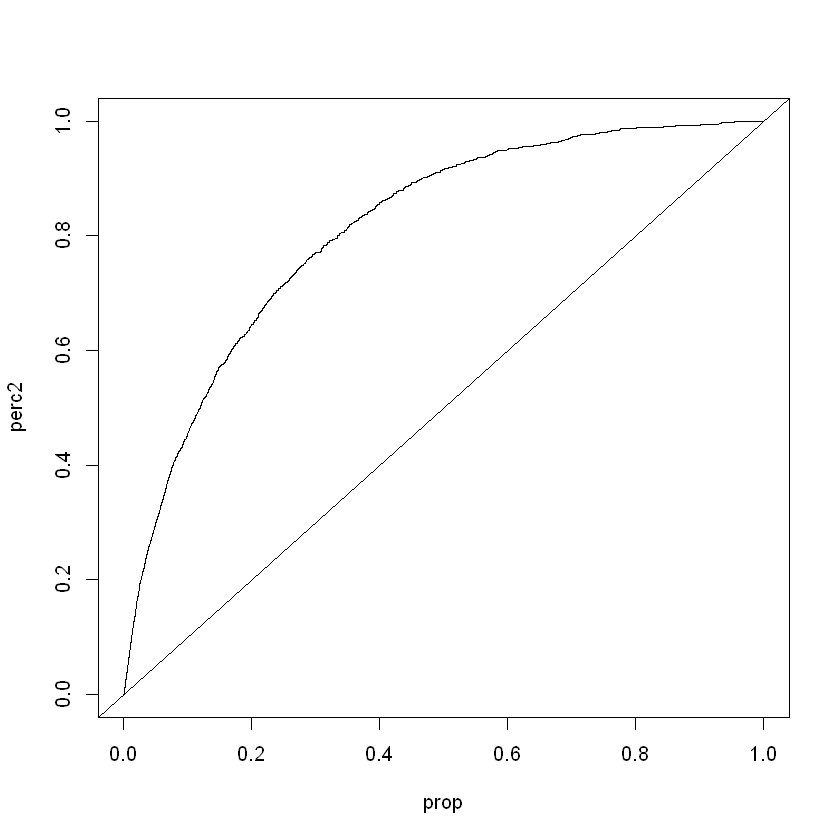

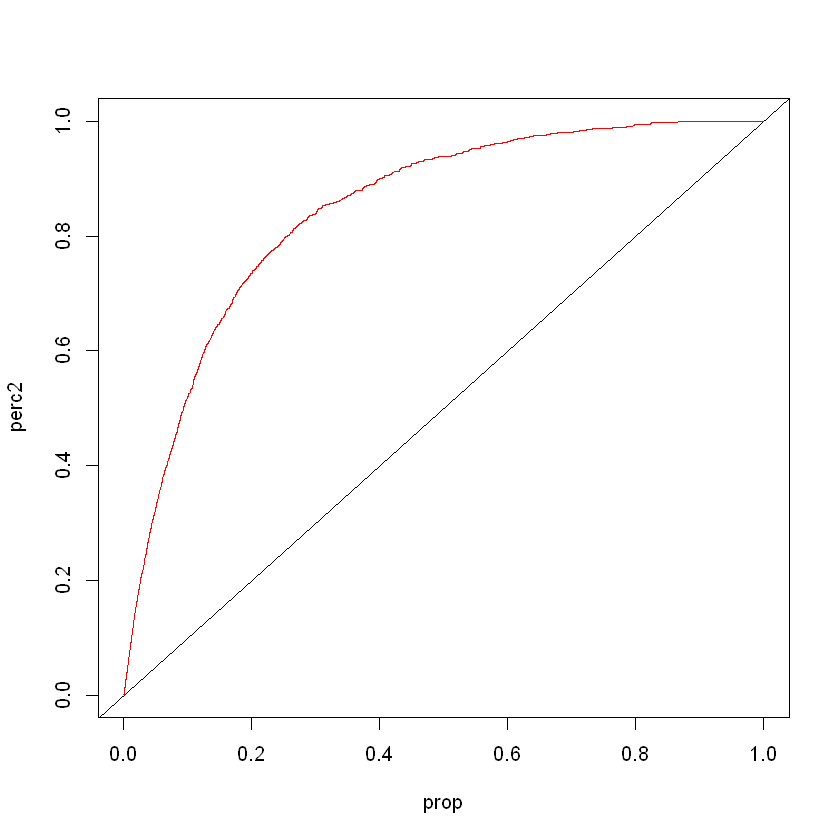

In [37]:
#Q2 ANN
#Read data set
d<-read.csv("bank-market1.csv")
d$deposit<-as.factor(d$deposit)

#Create of binary variable y based on deposit result
y<-as.numeric(d$deposit)
table(y)
y[y==1]<-0
y[y==2]<-1
table(y)

#Combine y into d and save as dnew
dnew<-cbind(y,d)

#Get and display sample size
(nnew<-nrow(dnew))
#Display names of d
names(dnew)

#Set sampling ratio
set.seed(34224)
r<-0.8
#Generate id
idnew<-sample(1:nnew,size=round(r*nnew),replace=F)
#Training dataset
d1new<-dnew[idnew,]
#Testing dataset
d2new<-dnew[-idnew,]

#Select columns 2, 5 and 8 to 11 from d and scale them using scale.con() function
#Function to scale continuous or ordinal variables to [0,1]
scale.con<-function(d) {
  #Row dim of d
  n<-dim(d)[1]
  #Column dim of d
  p<-dim(d)[2]		
  #Column min of d  
  cmin<-apply(d,2,min)
  #column max of d
  cmax<-apply(d,2,max)
  #Column range
  range<-cmax-cmin
  #Change cmin to a nxp matrix
  cmin<-matrix(cmin,nr=n,nc=p,byrow=T)
  #Change range to a nxp matrix
  range<-matrix(range,nr=n,nc=p,byrow=T)  
  #Transform d  
  (d-cmin)/range	
}  
#Select columns 2, 5 and 8 to 11
z<-scale.con(dnew[,c(2,5,8,9,10,11)])
#Scaled traning and testng data set
x1<-z[idnew,]
x2<-z[-idnew,]

# improved nnet()
# Try nnet(x,y) k times and output the best trial
# x is the matrix of input variable
# y is the dependent value; y must be factor if linout=F is used
# The default option of trace is set to F

library(nnet)
ann<-function(x,y,size,maxit=100,linout=F,trace=F,try=5) {
  ann1<-nnet(y~.,data=x,size=size,maxit=maxit,linout=linout,trace=trace)
  v1<-ann1$value
  
  for (i in 2:try) {
    ann<-nnet(y~.,data=x,size=size,maxit=maxit,linout=linout,trace=trace)
    if (ann$value<v1) {
      v1<-ann$value
      ann1<-ann
    }
  }
  ann1
}  


#Convert traning and testing data as factor
y1<-as.factor(d1new[,1]) 
y2<-as.factor(d2new[,1])


#Apply function to y1 and y2
ann6<-ann(x1,y1,size=6,maxit=500,try=20)
#Display best value
ann6$value
#Summary of output
summary(ann6)

#Prediction
pred1<-(ann6$fitted.values>0.5)
#Classification table for training data
table(pred1,y1)

#Predict on testing data
pr1<-predict(ann6,x2)
pred2<-(pr1>0.5)
#Classification table for testing data
table(pred2,y2)


#Apply function to y1 and y2
ann7<-ann(x1,y1,size=7,maxit=500,try=20)
#Display best value
ann7$value
#Summary of output
summary(ann7)

#Prediction
pred3<-(ann7$fitted.values>0.5)
#Classification table for training data
table(pred3,y1)

#Predict on testing data
pr2<-predict(ann7,x2) 
pred4<-(pr2>0.5)
#Classification table for testing data
table(pred4,y2)


# Produce lift chart 
# input y=binary target, p=Prob{Y=1}
# version ver=1 or 2 (default), 
# use add=T if add Lift Chart to existing plot
# color=col (default='black')

LChart<-function(y,p,ver=2,add=F,col='black') {
  ysort<-y[order(p,decreasing=T)]	# sort y according to p
  n<-length(y)				# get legnth of y
  ny<-sum(y)				# compute no. of 1 in y
  if (ver==1) {				# version 1
    perc1<-cumsum(ysort)/(1:n)
    if (add==F) {			# add=F, create a new plot
      plot(perc1,type='l',col=col)
      abline(h=ny/n) 
    } else 				# add to existing plot
      lines(perc1,type='l',col=col)
    
  } else 					# version 2
    perc2<-cumsum(ysort)/ny
  prop<-(1:n)/n
  if (add==F) {			# add=F, create a new plot
    plot(prop,perc2,type='l',col=col)
    abline(a=0,b=1)
  } else 				# add to existing plot
    lines(prop,perc2,type='l',col=col) 
}


#Lift chart for lreg
#Create target w
w<-d2new$y
#Lift chart
LChart(w,prob,col='black')


#Lift chart for ann7
#Create target w
w<-d2new$y
#Lift chart
LChart(w,pr2,col='red')
LChart(w,pr2,col='red',add=T)

<br></br>
<p>Perform artificial neural network and show its result.</p>
<br></br>
<p>Lift chart is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model. As area between the lift curve and the baseline in ann7’s lift chart is larger than that in lreg, ann7 has better predictive model which aligned with the result calculated in question 1 and 2. For example, if we contact 20% of customers, we will receive about 60% and 70% of the total positive responses in lreg and ann7 model respectively. So, it is recommended to use ann7 as the predictive model for this data set.</p>
<br></br>

cluster size= 26748 16892 
stat= 16197.2 
cluster size= 22986 5165 15489 
stat= 16482.83 
cluster size= 13890 20691 4126 4933 
stat= 17105.54 
cluster size= 2775 3887 12708 4710 19560 
stat= 16286.35 


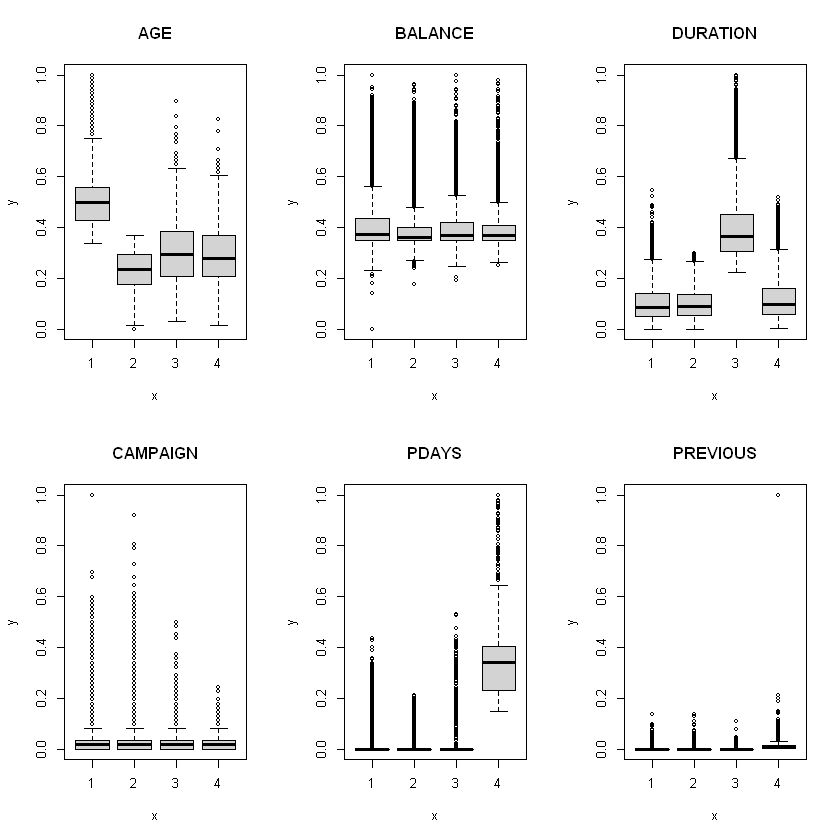

In [35]:
#Q3 Kmeans
#Read data set
d<-read.csv("bank-market1.csv")

#Select columns 1, 4 and 7 to 10 from d and scale them using scale.con() function
#Function to scale continuous or ordinal variables to [0,1]
scale.con<-function(d) {
  #Row dim of d
  n<-dim(d)[1]
  #Column dim of d
  p<-dim(d)[2]		
  #Column min of d  
  cmin<-apply(d,2,min)
  #column max of d
  cmax<-apply(d,2,max)
  #Column range
  range<-cmax-cmin
  #Change cmin to a nxp matrix
  cmin<-matrix(cmin,nr=n,nc=p,byrow=T)
  #Change range to a nxp matrix
  range<-matrix(range,nr=n,nc=p,byrow=T)  
  #Transform d  
  (d-cmin)/range	
}  
#Select columns 1, 4 and 7 to 10
z<-scale.con(d[,c(1,4,7,8,9,10)])


# improved kmeans()
# Try kmeans(x,k) serveal times and output the best (largest ratio) trial
# x is the matrix of input variable, k is the no. of clusters
# try is no. of trials
# display cluster size and stat, output cluster label
kmstat<-function(x,k) {
  km<-kmeans(x,k)			# k-means clustering with k=3
  ng<-km$size				# sample size
  n<-dim(x)[1]
  ssw<-sum(km$withinss)				# compute total within group ss
  ssb<-km$betweenss				# between group ss
  out<-list((n-k)*ssb/((k-1)*ssw),ng,km$cluster)# save stat, ng and cluster index into a list
  names(out)<-c("stat","size","cluster")	# apply names to list
  out						# output
}

km<-function(x,k,try=5) {		# default no. of trial is 5
  
  res0<-kmstat(x,k)			# save the result of the first trial
  r0<-res0$stat				# save the stat from the first trial
  
  for (i in 2:try) {
    res<-kmstat(x,k)  			# new trial 
    if (res$stat>r0) {			# if new trial is better
      r0<-res$stat			# update r0 and res
      res0<-res
    }
  }
  cat("cluster size=",res0$size,"\n")	# display cluster size
  cat("stat=",res0$stat,"\n")		# display stat
  res0$cluster				# output cluster label
}  


#Apply improved km function with K=2,3,4 & 5
km2<-km(z,2,try=20)
km3<-km(z,3,try=20) 
km4<-km(z,4,try=20)
km5<-km(z,5,try=20)


#Produce side by side boxplot for finding characteristics of clusters
#Define 2x3 multiframe graphic
par(mfrow=c(2,3))
#Convert label into factor
lab<-factor(km4)
#Boxplots with group labels from km4
plot(lab,z$age,main="AGE") 
plot(lab,z$balance,main="BALANCE")
plot(lab,z$duration,main="DURATION")
plot(lab,z$campaign,main="CAMPAIGN")
plot(lab,z$pdays,main="PDAYS")
plot(lab,z$previous,main="PREVIOUS")

<br></br>
<p>Perform K-means clustering and show its result.</p>
<br></br>
<p>From these boxplots, we can roughly describe the characteristics of cluster 1, 2, 3 and 4: For cluster 1, AGE and BALANCE have relatively higher value than those in cluster 2, 3 and 4. For cluster 2, AGE has relatively lower value than those in cluster 1, 3 and 4. For cluster 3, DURATION has higher value than those clusters 1, 2 and 4. For cluster 4, PDAYS has higher value than those cluster 1, 2 and 3.</p>
<br></br>